In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#x1, x1 값
X1 = np.arange(-1.0, 1.0, 0.2) # 원소수는 10개
X2 = np.arange(-1.0, 1.0, 0.2)

In [21]:
# 출력값을 저장할 10x10 그리드
Z = np.zeros((10, 10))

In [28]:
# x1, x2 값의 입력 가중치

#1 w_x1 = 2.5
#1 w_x2 = 3.0

#2
W = np.array([2.5, 3.0])

#편향
#1 bias = 0.1
#2
bias = np.array([0.1])

In [29]:
for i in range(10):
    for j in range(10):
        #1 u = X1[i] * w_x1 + X2[j] * w_x2 + bias
        xlist = [X1[i], X2[j]]
        X = np.array(xlist)
        u = np.dot(X, W.T) + bias
        y = 1 / (1+np.exp(-u)) # sigmoid함수 
        Z[j][i] = y

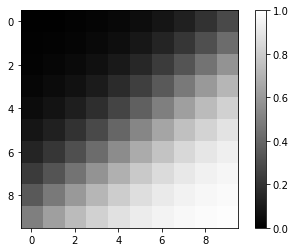

In [30]:
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

### 다중신경망

In [2]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

In [3]:
Z = np.zeros((10, 10))

In [4]:
# 가중치 선언
w_im = np.array([[4.0, 4.0],[4.0, 4.0]]) # 은닉층 (2,2) 행렬
w_mo = np.array([[1.0], [-1.0]]) # 출력층 (2,1)행렬


In [5]:
# 편향 선언
b_im = np.array([3.0, -3.0]) #은닉층 
b_mo = np.array([0.1])       #출력층

In [6]:
# hidden layer
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1+np.exp(-u)) # 활성화 함수


In [7]:
#output layer
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u                  # 활성화 함수

In [11]:
for i in range(10):
    for j in range(10):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        Z[j][i] = out[0]

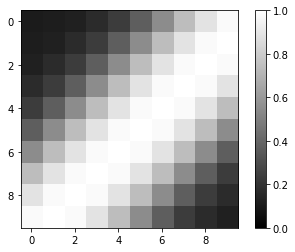

In [12]:
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

In [39]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

In [40]:
w_im = np.array([[1.0, 2.0], [2.0, 3.0]]) # 은닉층 2X2 행렬
w_mo = np.array([[-1.0, 1.0], [1.0, -1.0]]) # 출력층 

In [41]:
b_im = np.array([0.3, -0.3])
b_mo = np.array([0.4, 0.1])

In [42]:
# hidden layer
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1+np.exp(-u)) # 활성화 함수


In [43]:
#output layer
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/ np.sum(np.exp(u))    # 활성화 함수 softmax

In [44]:
x_1 = []
x_2 = []
y_1 = []
y_2 = []

In [45]:
for i in range(20):
    for j in range(20):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)

        # 확률의 크기를 비교해 분류함
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])

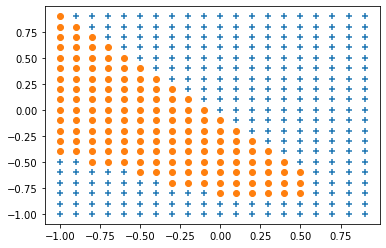

In [46]:
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()

## Loss function ( 손실함수)
    - 실제출력값과 정답과의 오차계산 함수 -

- 평균제곱 오차 : MSE(Mean squared error)
    (회귀문제에 주로 사용)
    - E = 1/n sigma (yk -tk)^2

In [47]:
import numpy as np

def mean_squared_error(y, t):
    return np.sum(np.power(y - t, 2)) / y.shape[0]

 - 오차 제곱 합 - SSE(sum of squares for Error)
     - 회귀문제에 주로 사용
     - E = 1/2 sigma (yk -tk)^2

In [49]:
def square_sum(y, t):
    return 1.0/2.0 * np.sum(np.square(y - t))

 - 교차 엔트로피

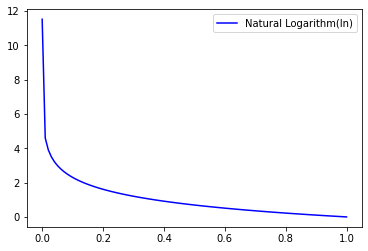

In [50]:
x = np.linspace(start = 0.00001, stop = 1.0, num = 100)
plt.plot(x, -np.log(x), 'b-', label = 'Natural Logarithm(ln)')
plt.legend()
plt.show()


In [51]:
def cross_entropy(y, t):
    return -np.sum(t*np.log(y + 1e-7))